# 📊 Employee HR Dataset — Exploratory Data Analysis (EDA)

In this notebook, we explore the HR dataset to understand:
- Employee demographics
- Salary & compensation distributions
- Attrition patterns
- Relationships between features

Dataset columns:
`EmployeeID, Name, Department, Gender, JobRole, Education, Age, Salary, Bonus, Attrition, TotalCompensation`

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

In [12]:
# Load dataset
df = pd.read_csv("../data/processed/hr_dataset.csv")   # adjust path if needed
df.head()

,EmployeeID,Name,Department,Gender,JobRole,Education,Age,Salary,Bonus,Attrition,TotalCompensation
0,1001,Emp_1,Sales,Male,Manager,High School,39,39239.0,6909,No,46148.0
1,1002,Emp_2,Marketing,Male,Consultant,Masters,53,30416.0,17150,No,47566.0
2,1003,Emp_3,IT,Female,Executive,High School,24,23412.0,28602,No,52014.0
3,1004,Emp_4,Marketing,Female,Engineer,Masters,23,101976.0,5080,No,107056.0
4,1005,Emp_5,Marketing,Male,Executive,PhD,54,44406.0,7083,No,51489.0


In [13]:
# Dataset overview
print("Shape:", df.shape)
print("\nInfo:")
df.info()

print("\nSummary statistics:")
df.describe(include="all").transpose()

Shape: (2000, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         2000 non-null   int64  
 1   Name               2000 non-null   object 
 2   Department         1961 non-null   object 
 3   Gender             1961 non-null   object 
 4   JobRole            2000 non-null   object 
 5   Education          2000 non-null   object 
 6   Age                2000 non-null   int64  
 7   Salary             1960 non-null   float64
 8   Bonus              2000 non-null   int64  
 9   Attrition          1960 non-null   object 
 10  TotalCompensation  1960 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 172.0+ KB

Summary statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeID,2000.0,NaN,NaN,NaN,2000.5,577.494589,1001.0,1500.75,2000.5,2500.25,3000.0
Name,2000,2000,Emp_1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,1961,12,HR,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1961,8,Female,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobRole,2000,5,Analyst,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,2000,4,Masters,521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2000.0,NaN,NaN,NaN,40.469,10.900112,22.0,31.0,40.0,50.0,59.0
Salary,1960.0,NaN,NaN,NaN,69234.92551,29729.536674,-30000.0,43207.0,69137.5,95121.0,119981.0
Bonus,2000.0,NaN,NaN,NaN,17676.264,7231.226538,5011.0,11388.5,17882.5,23732.75,29993.0
Attrition,1960,2,No,1570,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Check for missing values
df.isnull().sum()

EmployeeID            0
Name                  0
Department           39
Gender               39
JobRole               0
Education             0
Age                   0
Salary               40
Bonus                 0
Attrition            40
TotalCompensation    40
dtype: int64

## 🔍 Univariate Analysis
Explore distributions of key numerical and categorical features.

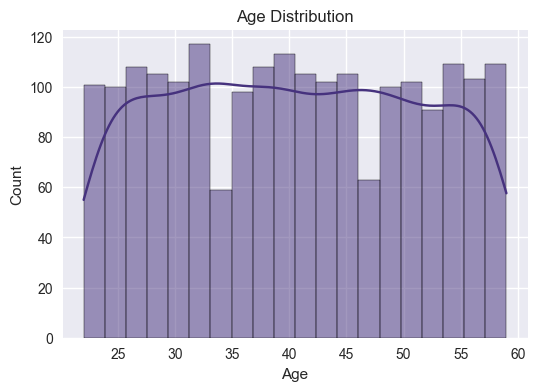

In [15]:
# Distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

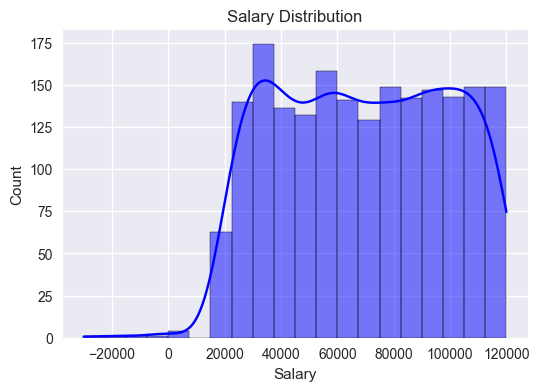

In [16]:
# Salary distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Salary"], kde=True, bins=20, color="blue")
plt.title("Salary Distribution")
plt.show()

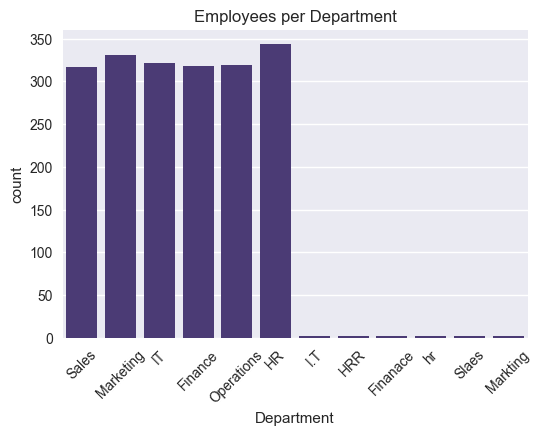

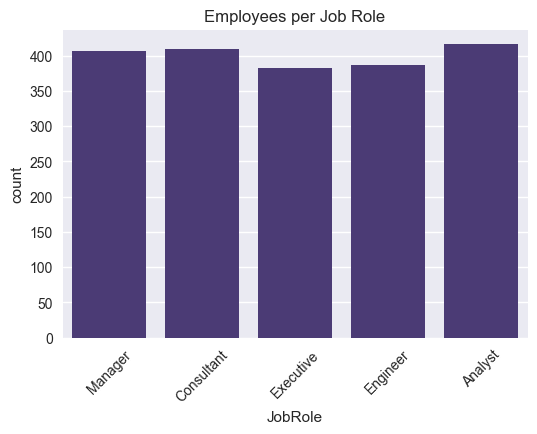

In [17]:
# Count plots for categorical variables
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Department")
plt.title("Employees per Department")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="JobRole")
plt.title("Employees per Job Role")
plt.xticks(rotation=45)
plt.show()

## 🔗 Bivariate Analysis
Attrition vs Age, Salary, JobRole, Department, etc.

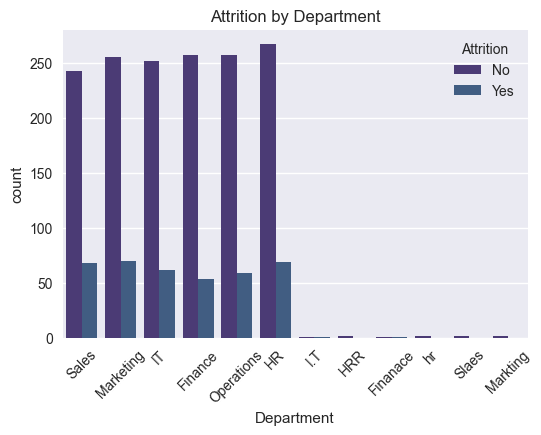

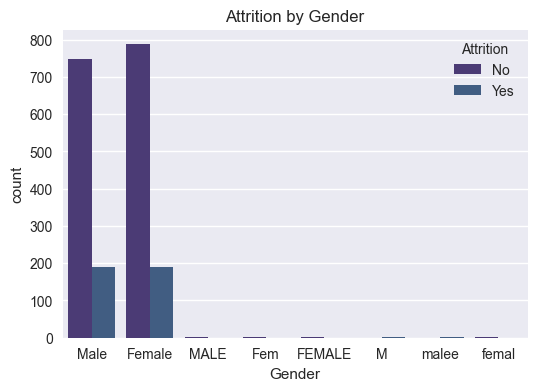

In [18]:
# Attrition by department
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Department", hue="Attrition")
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

# Attrition by gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="Attrition")
plt.title("Attrition by Gender")
plt.show()

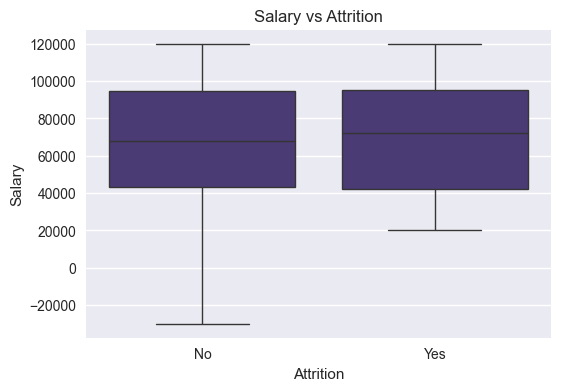

In [19]:
# Salary vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Attrition", y="Salary")
plt.title("Salary vs Attrition")
plt.show()

## 🔥 Correlation Analysis
Check numeric correlations and visualize them.

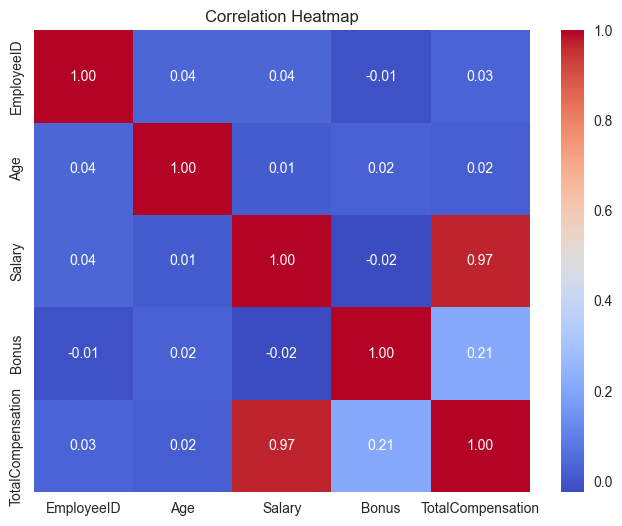

In [20]:
# Correlation heatmap
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## ✅ Key Insights from EDA

- Department names contain duplicates/misspellings → need cleaning.  
- Some salaries are negative/unrealistic → must be fixed or removed.  
- Attrition is higher in **Sales** and **HR** compared to other departments.  
- Strong correlation between **Salary** and **Total Compensation** → avoid redundancy.  
- **EmployeeID** is only an identifier → should be dropped before modeling.  

These insights will guide the next phase: **Data Preprocessing**.